In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
from linearmodels.panel import PooledOLS, RandomEffects
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('./company_data.csv')
df

,Year,com,ind,cod,em,beta,icr,rf,lr,sz,bmv,np
0,2016,Hindustan Unilever Limited,Consumer,0.072,54135,1.39,53.65,0.072,0.36,215373,183611.00,4137
1,2016,Reliance Industries Limited,Energy,0.140,787654,1.25,7.02,0.072,0.46,384355,420824.00,27417
2,2016,InterGlobe Aviation Limited,Aviation,0.200,234321,0.93,22.68,0.072,0.93,35593,7100.00,1986
3,2016,Tata Consultancy Services Limited,Informational Technology,0.070,23451,1.10,210.75,0.072,0.05,561437,229444.00,23075
4,2016,Tata Steel Limited,Materials,0.120,543276,1.23,1.71,0.072,0.59,45742,47684.00,4901
5,2016,Bharti Airtel Limited,Telecommunications,0.150,4532,0.68,4.15,0.072,0.53,147046,102704.00,7780
6,2016,Sun Pharmaceutical Industries Limited,Healthcare,0.110,57800,0.62,64.91,0.072,0.29,182535,97996.00,-1073
7,2016,NTPC Limited,Utilities,0.130,892350,0.82,3.67,0.072,0.94,163527,89118.00,10770
8,2016,Gujarat State Fertilizers & Chemicals Limited,Chemical,0.170,2453,0.86,2.87,0.072,0.60,1655,3324.00,409
9,2017,Hindustan Unilever Limited,Consumer,0.790,5789,0.85,53.34,0.067,0.18,376413,4534.00,4490


In [14]:
# Drop the columns that are not needed for regression analysis
X = df.drop(['com', 'ind', 'Year', 'cod'], axis=1)
print(X.columns)

Index(['em', 'beta', 'icr', 'rf', 'lr', 'sz', 'bmv', 'np'], dtype='object')


In [15]:
# Standardize the independent variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
# Apply PCA to reduce multicollinearity
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

In [17]:
# Add the dependent variable back to the dataframe
y = df['cod']

In [18]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_pca, y)

# Print the coefficients
print(model.coef_)

[-0.01192341  0.00329715  0.00275754]


In [19]:
# Add a constant term to the independent variables
X_pca = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cod   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              15.88
Date:                Sat, 12 Aug 2023   Prob (F-statistic):                    6.27e-11
Time:                        13:44:41   Log-Likelihood:                          50.670
No. Observations:                  54   AIC:                                     -85.34
Df Residuals:                      46   BIC:                                     -69.43
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
# Print the coefficients in normal format
print(f"Coefficients: {model.params.round(4)}")

Coefficients: em     -0.0000
beta   -0.0035
icr    -0.0004
rf      2.4744
lr      0.0016
sz      0.0000
bmv     0.0000
np     -0.0000
dtype: float64


            em      beta       icr        rf        lr        sz
em    1.000000 -0.141275 -0.229142 -0.227439  0.056316 -0.001114
beta -0.141275  1.000000 -0.129123  0.161269  0.072738 -0.093441
icr  -0.229142 -0.129123  1.000000  0.050122 -0.350549  0.467360
rf   -0.227439  0.161269  0.050122  1.000000 -0.226527 -0.241882
lr    0.056316  0.072738 -0.350549 -0.226527  1.000000 -0.230337
sz   -0.001114 -0.093441  0.467360 -0.241882 -0.230337  1.000000


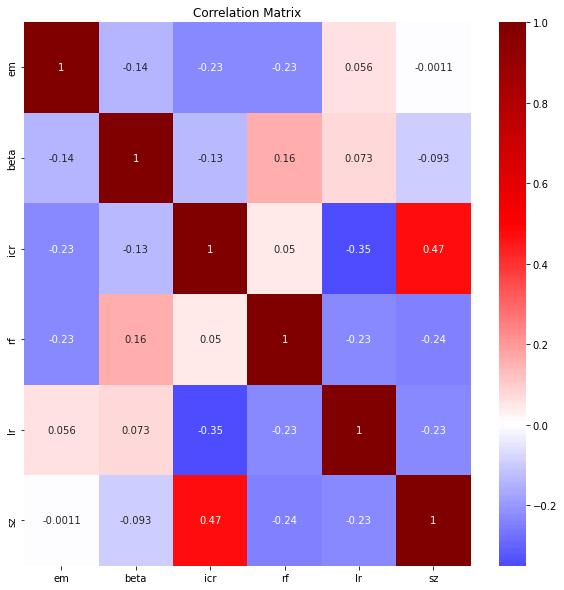

In [21]:
# select the relevant columns for correlation matrix
corr_data = df[['em', 'beta', 'icr', 'rf', 'lr', 'sz']]

# generate correlation matrix
corr_matrix = corr_data.corr()

# display the correlation matrix
print(corr_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', center=0, ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set a random seed
seed = 42

# Train the model using stochastic gradient descent
sgd = SGDRegressor(random_state=seed)
sgd.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = sgd.predict(X_test)

weights_df = pd.DataFrame({
    'feature': np.append(X.columns.values, 'Intercept'),
    'weight': np.append(model.params.values, model.params[-1])
})
weights_df

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.04384073038046949
